In [1]:
import pandas as pd
import numpy as np
pd.options.display.max_columns = None

In [2]:
# Both features and target have already been scaled: mean = 0; SD = 1
# See Chapter 4-0 for a descrition of this dataset
path = './data/'
df = pd.read_csv(path + 'Data_HousePrice_cleaned.csv') 
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,2003,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,0,150,856,Ex,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,RL,80.0,9600,Reg,Other,Other,1Story,6,8,1976,1976,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,0,284,1262,Ex,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,1,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2001,2002,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,0,434,920,Ex,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,1,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,RL,60.0,9550,IR1,Corner,Other,2Story,7,5,1915,1970,Wd Sdng,Other,None,0.0,TA,BrkTil,TA,No,ALQ,216,0,540,756,Gd,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,1,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,RL,84.0,14260,IR1,Other,Other,2Story,8,5,2000,2000,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,0,490,1145,Ex,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,1,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,2008,250000


In [3]:
cat_feat = list(df.dtypes[df.dtypes == 'object'].index)
numerical_feat = list(df.dtypes[df.dtypes != 'object'].index)

cat_dataset = df[cat_feat].copy()
num_dataset = df[numerical_feat].copy()
df_numerical = pd.DataFrame(num_dataset, columns=numerical_feat)

cat_dummies = pd.get_dummies(cat_dataset)
df = pd.concat([df_numerical, cat_dummies], axis = 1)

In [4]:
df.head(5)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_Other,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_Other,LotShape_Reg,LotConfig_Corner,LotConfig_Inside,LotConfig_Other,Neighborhood_CollgCr,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_Somerst,HouseStyle_1.5Fin,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Other,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Other,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Gd,ExterQual_Other,ExterQual_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_Other,Foundation_PConc,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Ex,HeatingQC_Gd,HeatingQC_Other,HeatingQC_TA,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_Other,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0


In [5]:
from sklearn.model_selection import train_test_split

cols = list(df.columns)
cols.remove('SalePrice')
X = df[cols].copy()
y = df['SalePrice'].copy()

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=0)

X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

print("X_train & y_train shape:", X_train.shape, y_train.shape)
print("X_test & y_test shape:", X_test.shape, y_test.shape)

X_train & y_train shape: (1536, 110) (1536,)
X_test & y_test shape: (659, 110) (659,)


In [6]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_Other,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_Other,LotShape_Reg,LotConfig_Corner,LotConfig_Inside,LotConfig_Other,Neighborhood_CollgCr,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_Somerst,HouseStyle_1.5Fin,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Other,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Other,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Gd,ExterQual_Other,ExterQual_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_Other,Foundation_PConc,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Ex,HeatingQC_Gd,HeatingQC_Other,HeatingQC_TA,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_Other,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf
0,70,60.0,9600,5,7,1910,2002,0.0,0,0,264,264,768,664,0,1432,0.0,0.0,2,0,2,1,7,0,1910.0,2,360,270,0,112,0,0,0,0,5,2007,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1
1,80,120.0,19296,6,5,1962,1962,399.0,672,690,0,1362,1382,0,0,1382,1.0,0.0,1,0,3,1,6,1,1991.0,2,884,0,0,252,0,0,0,0,5,2009,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1
2,20,72.0,8872,5,8,1965,2008,300.0,595,0,317,912,912,0,0,912,1.0,0.0,1,0,2,1,5,0,1992.0,2,576,0,240,0,0,0,0,0,12,2008,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1
3,50,60.0,7200,6,5,1954,1954,0.0,673,0,181,854,854,424,0,1278,0.0,0.0,1,0,4,1,6,0,1954.0,1,240,0,0,0,0,0,0,0,4,2008,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1
4,20,107.0,11362,8,5,2004,2005,42.0,1039,0,797,1836,1836,0,0,1836,1.0,0.0,2,0,3,1,7,1,2004.0,3,862,125,185,0,0,0,0,0,3,2009,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0


In [7]:
if 'SalePrice' in numerical_feat:
    numerical_feat.remove('SalePrice')
categorical_features = [feat for feat in list(X_train.columns) if feat not in numerical_feat]
#categorical_features

#### This can be an error for cross-validation, because we scale validation date with information off all the training set!!!

In [8]:
from sklearn.preprocessing import StandardScaler
sd = StandardScaler()

sd.fit(X_train[numerical_feat])
X_train_scaled = sd.transform(X_train[numerical_feat])
df_train_scaled = pd.DataFrame(X_train_scaled, columns=numerical_feat)
df_train = pd.concat([df_train_scaled, X_train[categorical_features]], axis = 1)


X_test_scaled = sd.transform(X_test[numerical_feat])
df_test_scaled = pd.DataFrame(X_test_scaled, columns=numerical_feat)
df_test = pd.concat([df_test_scaled, X_test[categorical_features]], axis = 1)

print("X_train & y_train shape:", df_train.shape, y_train.shape)
print("X_test & y_test shape:", df_test.shape, y_test.shape)

X_train & y_train shape: (1536, 110) (1536,)
X_test & y_test shape: (659, 110) (659,)


In [9]:
#df_train.head()

In [10]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

params = { 
    "learning_rate" : [0.01, 0.05, 0.1, 0.2],
    "n_estimators": [5, 10, 20 ,50, 100, 200],
    "subsample":[1]
    "max_depth" : [2,3,5]
}

gb_reg = GradientBoostingRegressor()
gd = GridSearchCV(
    gb_reg,  ## model to fit
    params, # grid of hyperparameter
    cv = 5,  # if integer assume k-fold, could assign any type of splitting method (see sklearn.model_selection)
    scoring = "neg_mean_squared_error", # scoring method to evaluate a model (https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter)
    n_jobs =2,
    verbose = 3, refit=True
)

In [11]:
gd.fit(df_train.values, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=2,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'max_depth': [2, 3, 5],
                         'n_estimators': [5, 10, 20, 50, 100, 200]},
             scoring='neg_mean_squared_error', verbose=3)

In [12]:
result = pd.DataFrame(gd.cv_results_)

In [13]:
result.sort_values("rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
47,0.867386,0.014454,0.001403,4.926357e-04,0.1,3,200,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",-6.215590e+08,-4.534355e+08,-4.272231e+08,-4.870999e+08,-4.283887e+08,-4.835412e+08,7.236223e+07,1
41,0.578333,0.004802,0.001202,3.991927e-04,0.1,2,200,"{'learning_rate': 0.1, 'max_depth': 2, 'n_esti...",-5.841107e+08,-4.951538e+08,-4.213926e+08,-5.200050e+08,-4.247121e+08,-4.890748e+08,6.123543e+07,2
29,0.847990,0.004386,0.001200,3.990174e-04,0.05,3,200,"{'learning_rate': 0.05, 'max_depth': 3, 'n_est...",-6.353963e+08,-4.924454e+08,-4.300134e+08,-4.990180e+08,-4.263651e+08,-4.966476e+08,7.570237e+07,3
46,0.432699,0.007767,0.000901,4.917378e-04,0.1,3,100,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",-6.636262e+08,-4.725057e+08,-4.314412e+08,-4.882548e+08,-4.459388e+08,-5.003534e+08,8.401156e+07,4
59,0.596250,0.018180,0.001000,6.468134e-07,0.2,2,200,"{'learning_rate': 0.2, 'max_depth': 2, 'n_esti...",-5.948067e+08,-5.139975e+08,-4.587616e+08,-5.859501e+08,-4.559662e+08,-5.218964e+08,5.968915e+07,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,0.044069,0.000906,0.000200,3.995895e-04,0.01,3,10,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",-5.740731e+09,-4.674884e+09,-7.032399e+09,-6.126925e+09,-5.590144e+09,-5.833017e+09,7.659860e+08,68
1,0.030842,0.000195,0.000000,0.000000e+00,0.01,2,10,"{'learning_rate': 0.01, 'max_depth': 2, 'n_est...",-5.778832e+09,-4.759054e+09,-7.166487e+09,-6.245811e+09,-5.661741e+09,-5.922385e+09,7.866733e+08,69
12,0.034831,0.000423,0.000224,4.488945e-04,0.01,5,5,"{'learning_rate': 0.01, 'max_depth': 5, 'n_est...",-6.100761e+09,-5.034685e+09,-7.541688e+09,-6.542898e+09,-5.937461e+09,-6.231499e+09,8.184718e+08,70
6,0.022602,0.000492,0.000400,4.896873e-04,0.01,3,5,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",-6.147281e+09,-5.064419e+09,-7.564796e+09,-6.616701e+09,-6.012257e+09,-6.281091e+09,8.162109e+08,71


In [14]:
best_params = result.sort_values("rank_test_score").head(1)["params"].values[0]  #take head(1), i.e. the best
best_params

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}

In [15]:
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

def plot_result(y_prediction, Y_true):
    fig , ax = plt.subplots(1,1,figsize=(10,5))
    ax.scatter(y_prediction, Y_true)
    ax.plot([0,500000],[0,500000], "--", c='red', label = "$Y_{pred} = Y_{true}$")
    ax.set_xlabel("$Y_{pred}$", fontsize = 12)
    ax.set_ylabel("$Y_{true}$", fontsize = 12)
    plt.legend()
    plt.show()
    print("mean_absolute_error:", mean_absolute_error(y_prediction, Y_true))
    print("mean_squared_error:", mean_squared_error(y_prediction, Y_true))
    print("mean_absolute_percentage_error:", mean_absolute_percentage_error(y_prediction, Y_true))

TEST RESULT


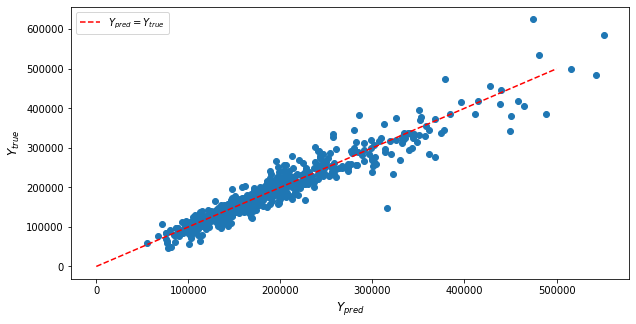

mean_absolute_error: 15588.92002000006
mean_squared_error: 554768033.273627
mean_absolute_percentage_error: 0.08267429276818701
TRAIN RESULT


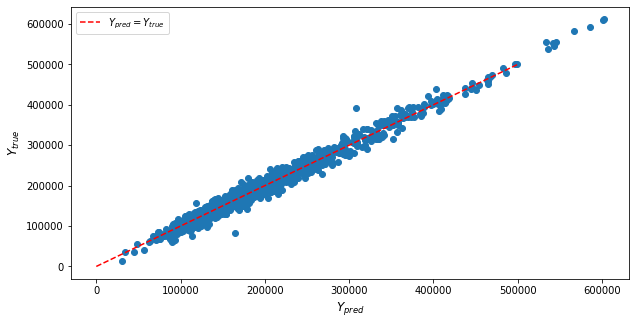

mean_absolute_error: 8633.600994222234
mean_squared_error: 132183802.41665535
mean_absolute_percentage_error: 0.0514854189539187


In [16]:
best_model = GradientBoostingRegressor(**best_params)
best_model.fit(df_train, y_train)

y_pred_test = best_model.predict(df_test)

y_pred_train = best_model.predict(df_train)

print("TEST RESULT")
plot_result(y_pred_test, y_test)

print("TRAIN RESULT")
plot_result(y_pred_train, y_train)

# Shap with GradientBoosting

In [17]:
import shap

explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(df_test)

In [18]:
y_pred_test.mean(), y_pred_train.mean(), y_train.mean(), explainer.expected_value

(187381.87971403825,
 185270.81901041666,
 185270.81901041666,
 array([185270.81901042]))

In [19]:
shap_sum = y_pred_train.mean() + shap_values.sum(axis=1)
shap_sum

array([181146.97212327, 100755.05747624, 226893.53337099, 140065.49691356,
       181847.0941611 , 121317.21107424, 241421.79966687, 114485.99813582,
       123497.92313708,  88731.8066797 , 167757.06944301, 167272.81679982,
       113985.78911689, 168095.71141103, 145447.51730321, 127513.75523337,
       135874.75252584, 173814.55228616, 135557.62030431, 126337.78331849,
       118464.37549527, 146003.82108128, 290962.04404306, 193905.22507225,
       320676.65581813, 155532.25325243, 161245.88992906, 200806.38060278,
       145919.5261701 , 243368.87352818, 119441.45051341, 296524.7655893 ,
       203192.98089554, 179064.63960903, 222818.31602925, 221517.04422519,
       183612.17496434, 197695.23851677, 129257.31889156, 137974.34705597,
       103175.9549478 ,  76768.94648984, 458591.44212682, 304363.69919403,
       186550.84628215, 188221.97244646, 260909.69032302, 156287.59060724,
       138428.6871712 , 131804.50541295, 122973.24599492, 105951.41004766,
       151498.69977483, 2

In [20]:
y_pred_test

array([181146.97212327, 100755.05747624, 226893.53337099, 140065.49691356,
       181847.0941611 , 121317.21107424, 241421.79966687, 114485.99813582,
       123497.92313708,  88731.8066797 , 167757.06944301, 167272.81679982,
       113985.78911689, 168095.71141103, 145447.51730321, 127513.75523337,
       135874.75252584, 173814.55228616, 135557.62030431, 126337.78331849,
       118464.37549527, 146003.82108128, 290962.04404306, 193905.22507225,
       320676.65581813, 155532.25325243, 161245.88992906, 200806.38060278,
       145919.5261701 , 243368.87352818, 119441.45051341, 296524.7655893 ,
       203192.98089554, 179064.63960903, 222818.31602925, 221517.04422519,
       183612.17496434, 197695.23851677, 129257.31889156, 137974.34705597,
       103175.9549478 ,  76768.94648984, 458591.44212682, 304363.69919403,
       186550.84628215, 188221.97244646, 260909.69032302, 156287.59060724,
       138428.6871712 , 131804.50541295, 122973.24599492, 105951.41004766,
       151498.69977483, 2

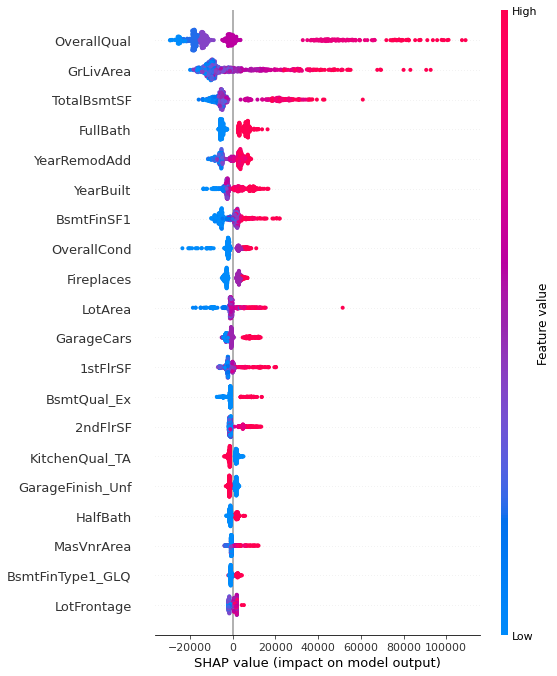

In [21]:
#shap_values = explainer(df_test)
shap.summary_plot(shap_values, df_test)

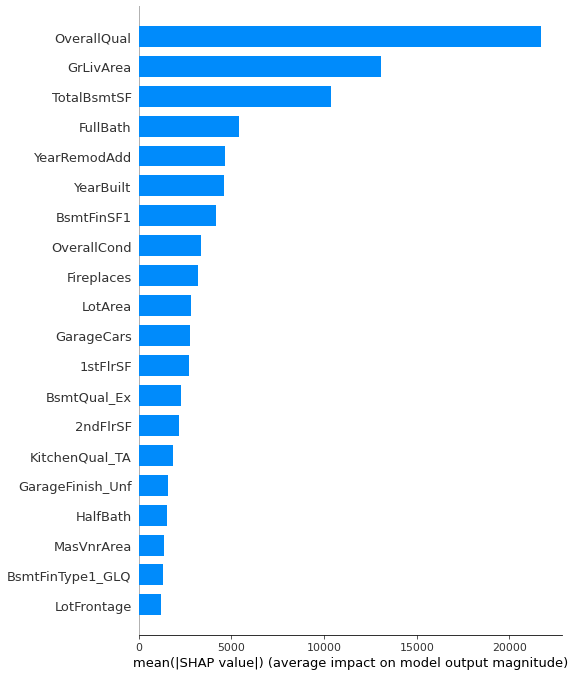

In [22]:
shap.summary_plot(shap_values, df_test, plot_type="bar")

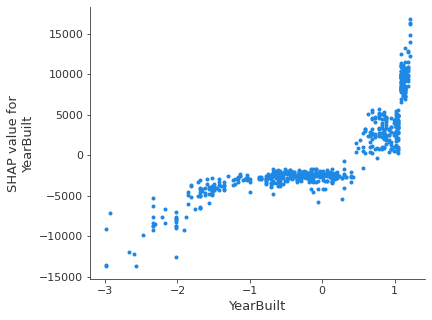

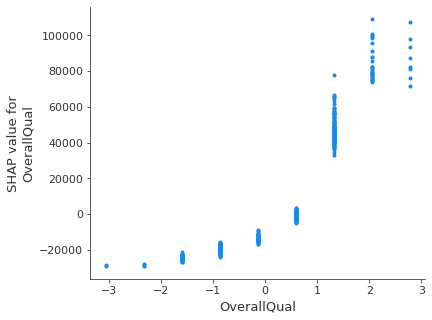

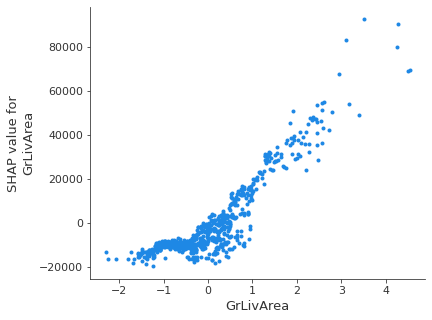

In [23]:
col_to_see = ["YearBuilt", "OverallQual", "GrLivArea"]
for name in col_to_see:
    shap.dependence_plot(name, shap_values, df_test, interaction_index=None)

In [24]:
i = 18
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[i], df_test.loc[i])

In [25]:
shap_values[i].sum() + y_train.mean()

135557.62030431043

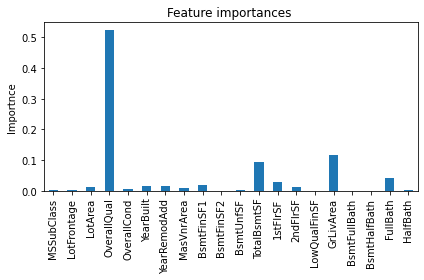

In [26]:
best_model.feature_importances_
fig, ax = plt.subplots()
forest_importances = pd.Series(best_model.feature_importances_[:20], index=df_train.columns[:20])
forest_importances.plot.bar()
ax.set_title("Feature importances ")
ax.set_ylabel("Importnce")
fig.tight_layout()

# Shap with KernelRidge

In [27]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV

params = [
  {'alpha': [1, 5, 10, 20, 100, 1000], 'kernel': ['linear']},
  {'alpha': [1, 5, 10, 20, 100, 1000], 'kernel': ['poly'], "degree" : [2,3]},
  {'alpha': [1, 5, 10, 20, 100, 1000], 'gamma': [0.01, 0.1, 0.5], 'kernel': ['rbf']},
    ]

base_estimator = KernelRidge()

In [28]:
gd = GridSearchCV(
    base_estimator,  ## model to fit
    params, # grid of hyperparameter
    cv = 5,  # if integer assume k-fold, could assign any type of splitting method (see sklearn.model_selection)
    scoring = "neg_mean_squared_error", # scoring method to evaluate a model (https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter)
    n_jobs =2,
    verbose = 3, refit=True
)

In [29]:
gd.fit(df_train.values, y_train) ## number of fits (6+ (6*2) + (6*3)) * 5

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=KernelRidge(), n_jobs=2,
             param_grid=[{'alpha': [1, 5, 10, 20, 100, 1000],
                          'kernel': ['linear']},
                         {'alpha': [1, 5, 10, 20, 100, 1000], 'degree': [2, 3],
                          'kernel': ['poly']},
                         {'alpha': [1, 5, 10, 20, 100, 1000],
                          'gamma': [0.01, 0.1, 0.5], 'kernel': ['rbf']}],
             scoring='neg_mean_squared_error', verbose=3)

In [30]:
result = pd.DataFrame(gd.cv_results_)

In [31]:
result.sort_values("rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_kernel,param_degree,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
6,0.052571,0.002244,0.004730,0.001096,1,poly,2,NaN,"{'alpha': 1, 'degree': 2, 'kernel': 'poly'}",-4.445905e+08,-5.029924e+08,-4.246816e+08,-4.551350e+08,-3.634067e+08,-4.381612e+08,4.539264e+07,1
7,0.083025,0.002898,0.012326,0.000509,1,poly,3,NaN,"{'alpha': 1, 'degree': 3, 'kernel': 'poly'}",-4.628487e+08,-4.869827e+08,-4.464185e+08,-4.481555e+08,-3.564114e+08,-4.401633e+08,4.432619e+07,2
9,0.082139,0.003668,0.012521,0.000918,5,poly,3,NaN,"{'alpha': 5, 'degree': 3, 'kernel': 'poly'}",-4.771705e+08,-4.965999e+08,-4.894637e+08,-4.414729e+08,-3.826455e+08,-4.574705e+08,4.194633e+07,3
11,0.082101,0.003752,0.012518,0.001556,10,poly,3,NaN,"{'alpha': 10, 'degree': 3, 'kernel': 'poly'}",-5.218129e+08,-5.062217e+08,-5.281428e+08,-4.692933e+08,-4.412158e+08,-4.933373e+08,3.311512e+07,4
8,0.050995,0.002610,0.004450,0.000960,5,poly,2,NaN,"{'alpha': 5, 'degree': 2, 'kernel': 'poly'}",-5.286962e+08,-5.095445e+08,-5.272875e+08,-4.993147e+08,-4.558829e+08,-5.041452e+08,2.653320e+07,5
13,0.082712,0.002842,0.012468,0.001483,20,poly,3,NaN,"{'alpha': 20, 'degree': 3, 'kernel': 'poly'}",-6.090701e+08,-5.229131e+08,-6.146378e+08,-5.374043e+08,-5.499537e+08,-5.667958e+08,3.781319e+07,6
10,0.052150,0.002062,0.003998,0.000647,10,poly,2,NaN,"{'alpha': 10, 'degree': 2, 'kernel': 'poly'}",-6.222917e+08,-5.194692e+08,-6.417522e+08,-5.717087e+08,-5.574817e+08,-5.825407e+08,4.429322e+07,7
1,0.052520,0.003503,0.003880,0.000462,5,linear,NaN,NaN,"{'alpha': 5, 'kernel': 'linear'}",-5.663513e+08,-6.348391e+08,-6.227654e+08,-6.096676e+08,-4.953287e+08,-5.857904e+08,5.080206e+07,8
2,0.049772,0.002396,0.003909,0.000506,10,linear,NaN,NaN,"{'alpha': 10, 'kernel': 'linear'}",-5.641259e+08,-6.309498e+08,-6.290993e+08,-6.091070e+08,-4.962214e+08,-5.859007e+08,5.089322e+07,9
0,0.058739,0.003551,0.003966,0.000421,1,linear,NaN,NaN,"{'alpha': 1, 'kernel': 'linear'}",-5.749777e+08,-6.407738e+08,-6.199903e+08,-6.128204e+08,-4.966887e+08,-5.890502e+08,5.084551e+07,10


In [32]:
#result.sort_values("rank_test_score").head(1)["params"].values[0]

In [33]:
best_params = result.sort_values("rank_test_score").head(1)["params"].values[0]  #take head(1), i.e. the best

In [34]:
best_params

{'alpha': 1, 'degree': 2, 'kernel': 'poly'}

TEST RESULT


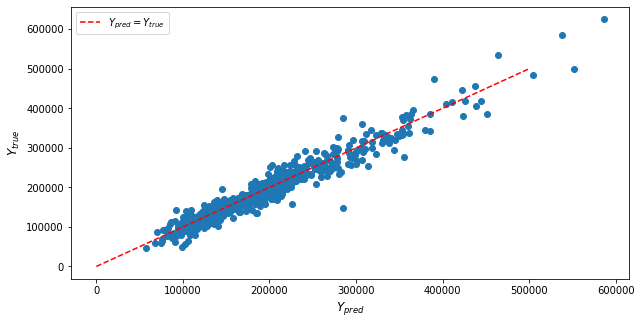

mean_absolute_error: 13873.933328163741
mean_squared_error: 376893235.4500312
mean_absolute_percentage_error: 0.07728469774259912
TRAIN RESULT


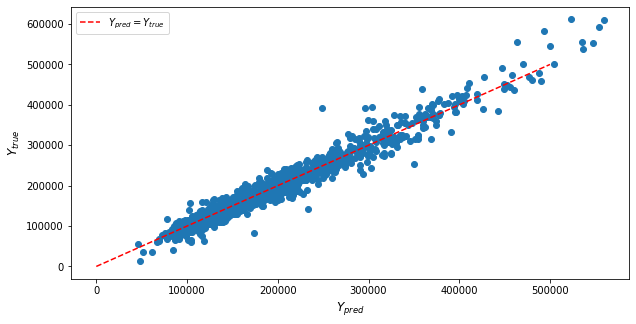

mean_absolute_error: 11828.56326488567
mean_squared_error: 297131826.8446222
mean_absolute_percentage_error: 0.06643489190188288


In [35]:
best_model = KernelRidge(**best_params)
best_model.fit(df_train, y_train)

y_pred_test = best_model.predict(df_test)

y_pred_train = best_model.predict(df_train)

print("TEST RESULT")
plot_result(y_pred_test, y_test)

print("TRAIN RESULT")
plot_result(y_pred_train, y_train)

In [36]:
#best_model

In [37]:
XX = df_test.iloc[:50]
YY = y_pred_test[:50]

In [38]:
import shap

explainer = shap.KernelExplainer(best_model.predict, XX)
shap_values = explainer.shap_values(XX)


X does not have valid feature names, but KernelRidge was fitted with feature names


  0%|          | 0/50 [00:00<?, ?it/s]

X does not have valid feature names, but KernelRidge was fitted with feature names
X does not have valid feature names, but KernelRidge was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but KernelRidge was fitted with feature names
X does not have valid feature names, but KernelRidge was fitted with feature names
The default of 'normalize' will be set to

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but KernelRidge was fitted with feature names
X does not have valid feature names, but KernelRidge was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the prev

X does not have valid feature names, but KernelRidge was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but KernelRidge was fitted with feature names
X does not have valid feature names, but KernelRidge was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data,

X does not have valid feature names, but KernelRidge was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but KernelRidge was fitted with feature names
X does not have valid feature names, but KernelRidge was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data,

X does not have valid feature names, but KernelRidge was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but KernelRidge was fitted with feature names
X does not have valid feature names, but KernelRidge was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data,

In [39]:
YY.mean(), explainer.expected_value

(174434.2188019055, 174434.21880190546)

In [40]:
shap_sum = YY.mean() + shap_values.sum(axis=1)
shap_sum

array([195112.84715312,  97843.2479624 , 253430.20093309, 133069.63937598,
       179113.78016206, 122052.6478764 , 253988.15341118, 103412.22819052,
       120772.08044579,  86303.4022343 , 165355.78786582, 147274.54106122,
       108799.34965482, 133811.8532271 , 144330.5271789 , 123349.69260552,
       149019.73153938,  91988.50869728, 137987.8383019 , 132609.55426951,
       126327.39627459, 147840.48063591, 301729.70022151, 177967.01297511,
       297877.61371581, 185475.68834502, 158383.24598465, 194673.17003769,
       140020.14136873, 264947.63375099, 107969.67136689, 273865.52351081,
       208020.797505  , 184031.78229183, 230224.11713288, 212284.32850713,
       187170.79573164, 200409.43548954, 129996.57192516, 131095.14475515,
        87936.52521822,  74701.89345033, 444140.89370132, 290598.47980853,
       190905.9127032 , 215539.78963128, 260922.65396981, 144007.59733488,
       144912.70932591, 128108.62127948])

In [41]:
YY

array([195112.84715312,  97843.2479624 , 253430.20093309, 133069.63937598,
       179113.78016206, 122052.6478764 , 253988.15341118, 103412.22819052,
       120772.08044578,  86303.4022343 , 165355.78786582, 147274.54106122,
       108799.34965482, 133811.8532271 , 144330.5271789 , 123349.69260552,
       149019.73153938,  91988.50869728, 137987.8383019 , 132609.55426952,
       126327.39627459, 147840.48063591, 301729.7002215 , 177967.01297511,
       297877.61371581, 185475.68834502, 158383.24598465, 194673.17003769,
       140020.14136873, 264947.63375099, 107969.67136689, 273865.52351081,
       208020.797505  , 184031.78229183, 230224.11713288, 212284.32850713,
       187170.79573164, 200409.43548954, 129996.57192516, 131095.14475515,
        87936.52521822,  74701.89345033, 444140.89370132, 290598.47980853,
       190905.9127032 , 215539.78963128, 260922.65396981, 144007.59733487,
       144912.70932591, 128108.62127948])

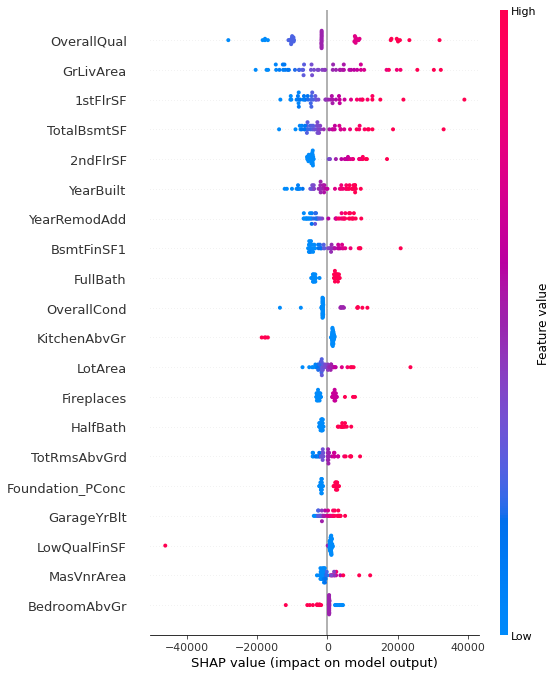

In [42]:
shap.summary_plot(shap_values, XX)

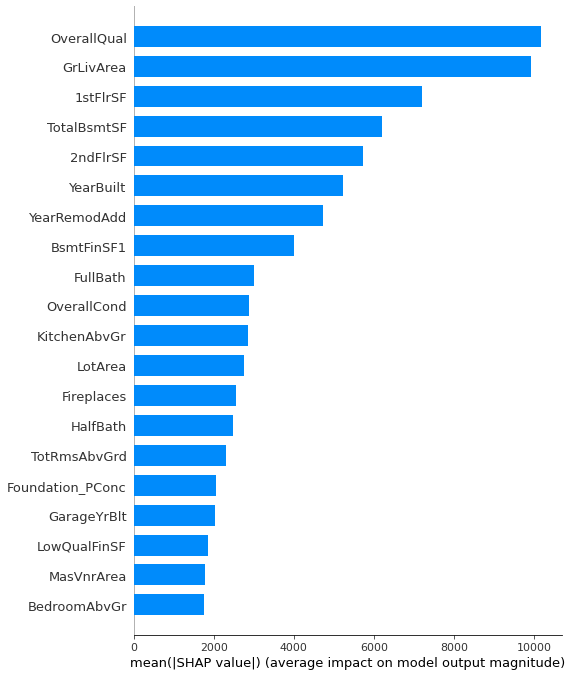

In [43]:
shap.summary_plot(shap_values, XX, plot_type="bar")

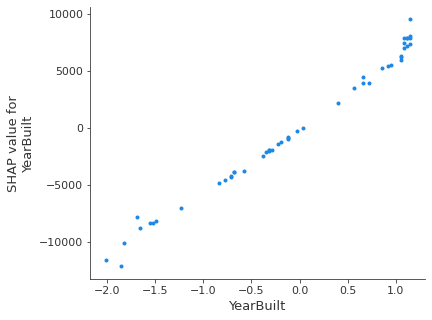

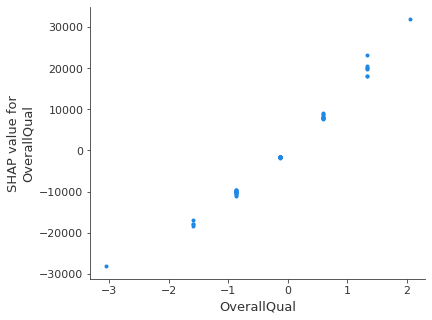

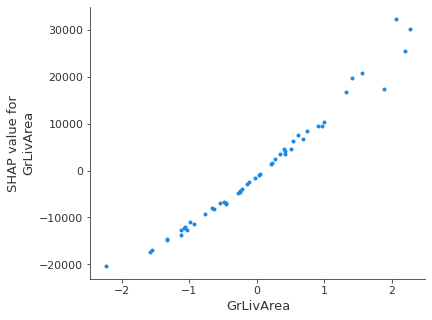

In [44]:
col_to_see = ["YearBuilt", "OverallQual", "GrLivArea"]
for name in col_to_see:
    shap.dependence_plot(name, shap_values, XX, interaction_index=None)

In [45]:
i = 18
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[i], XX.reset_index(drop=True).iloc[i])

In [46]:
#XX.reset_index(drop=True).iloc[18]

In [ ]:
#len(shap_values[i])